In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [2]:


def pol2cart(deg,r):
    """
    convert angle from deg, r to x, y
    """
    x = r * np.sin(np.deg2rad(deg))
    y = r * np.cos(np.deg2rad(deg))
    return x, y
    

In [3]:

deg, lag = np.meshgrid(np.linspace(-180,180,91),
                       np.arange(-10*2,11*2,4).astype(int))
positions = np.vstack((deg.ravel(),lag.ravel()))
values = positions
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T,deg.shape)

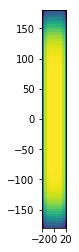

In [4]:
xmin=lag.min()
xmax=lag.max()
ymin=deg.min()
ymax=deg.max()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap='viridis',extent=[xmin, xmax, ymin, ymax])
# ax.plot(lag, deg, 'k.', markersize=2)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
plt.show()


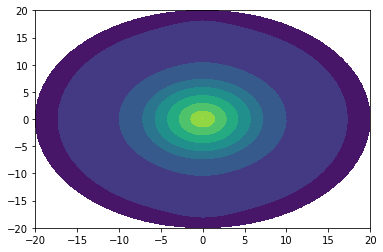

In [5]:
x,y = pol2cart(2*deg,lag)

xmin=x.min()
xmax=x.max()
ymin=y.min()
ymax=y.max()

positions = np.vstack((x.ravel(),y.ravel()))
values = positions
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions),x.shape)

fig, ax = plt.subplots()
plt.contourf(x,y,Z, cmap='viridis',extent=[xmin, xmax, ymin, ymax])
# ax.plot(x, y, 'k.', markersize=2)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
plt.show()

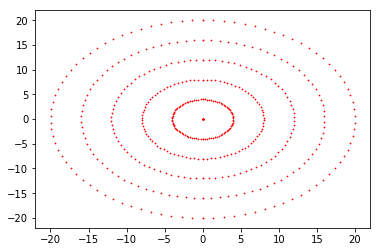

In [6]:
plt.plot(x.ravel(),y.ravel(),'ro',ms=.5)

In [7]:
lag.ravel().shape

(1001,)

In [8]:
lag

array([[-20, -20, -20, ..., -20, -20, -20],
       [-16, -16, -16, ..., -16, -16, -16],
       [-12, -12, -12, ..., -12, -12, -12],
       ...,
       [ 12,  12,  12, ...,  12,  12,  12],
       [ 16,  16,  16, ...,  16,  16,  16],
       [ 20,  20,  20, ...,  20,  20,  20]])

In [9]:
lag.size

1001

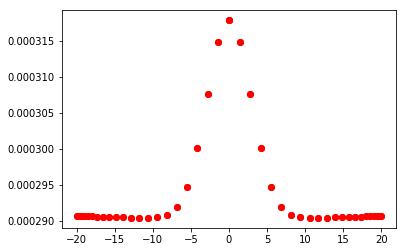

In [10]:
plt.plot(x[0,:],Z[0,:],'ro')

In [11]:
def rho(n,step):
    if n == 0:
        return 1 / (np.pi/4 * step**2)
    elif n > 0:
        return 1 / (2 * np.pi * n * step)
    else:
        raise Exception('n not valid')
        
rho = np.vectorize(rho)

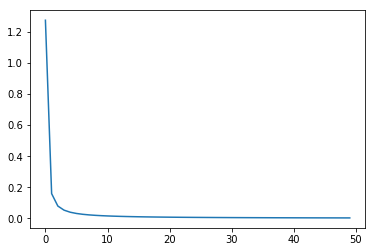

In [12]:
lags = np.arange(50)
rhos = rho(lags,1)
plt.plot(lags,rhos)

In [13]:
import splitwavepy as sw

In [14]:
A = sw.Data().Split()

In [26]:
hd = .5*A.data._delta


array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25,
       3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35,
       4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45,
       5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45, 6.55,
       6.65, 6.75, 6.85, 6.95, 7.05, 7.15, 7.25, 7.35, 7.45, 7.55, 7.65,
       7.75, 7.85, 7.95, 8.05, 8.15, 8.25, 8.35])